In [65]:
## By Lin Xiao Zheng
## McGill ID 260911511

## INSTRUCTIONS
## 1. Load & Parse data from files
## 2. Determine average loan amount by ownership status (RENT/MORTGAGE/OWN)
## 3. Plot results in a graph

import csv
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Parse home_ownership_data.csv and store IDs according to ownership type
mortgage_IDs = []
own_IDs = []
rent_IDs = []

with open('home_ownership_data.csv','r') as owner_data:  ## 'r' means READ mode
    reader = csv.reader(owner_data, delimiter = ',')
    line = 0
    for row in reader:
        if line == 0:
            # Title line: do nothing
            line += 1
        else:
            if(row[1] == 'MORTGAGE'):
                mortgage_IDs.append(row[0])
            elif(row[1] == 'OWN'):
                own_IDs.append(row[0])
            elif(row[1] == 'RENT'):
                rent_IDs.append(row[0])

In [67]:
# Parse loan_data.csv and add amounts according to ownership type
mortgage_sum = 0
own_sum = 0
rent_sum = 0

with open('loan_data.csv', 'r') as loan_data:
    reader = csv.reader(loan_data, delimiter = ',')
    line = 0
    for row in reader:
        if line == 0:
            line += 1
        else:
            current_ID = row[0]
            if current_ID in mortgage_IDs:
                mortgage_sum += int(row[1])
            elif current_ID in own_IDs:
                own_sum += int(row[1])
            elif current_ID in rent_IDs:
                rent_sum += int(row[1])
                
mortgage_avg = mortgage_sum/len(mortgage_IDs)
own_avg = own_sum/len(own_IDs)
rent_avg = rent_sum/len(rent_IDs)

HOME OWNERSHIP	|  AVERAGE LOAN AMOUNT ($)
Mortgage	|  13502.830188679245
Own		|  9603.57142857143
Rent		|  11067.481203007519


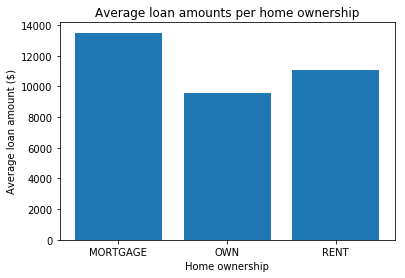

In [68]:
# Plot and display the results
labels = ['MORTGAGE', 'OWN', 'RENT']
loan_avg = [mortgage_avg, own_avg, rent_avg]

def plot_results():
    index = np.arange(len(labels))
    plt.bar(index, loan_avg)
    plt.xlabel('Home ownership')
    plt.ylabel('Average loan amount ($)')
    plt.xticks(index, labels)
    plt.title('Average loan amounts per home ownership')
    plt.show()

print('HOME OWNERSHIP\t|  AVERAGE LOAN AMOUNT ($)')
print('Mortgage\t|  ' + str(mortgage_avg))
print('Own\t\t|  ' + str(own_avg))
print('Rent\t\t|  ' + str(rent_avg))
plot_results()